# Objective
- The objective of this project is to develop a SENTIMENT ANALYSIS NLP Model that will analyze customer reviews about products purchased from Amazon so as to classify sentiments, extract valuable insights, and provide actionable information to enhance product quality, customer satisfaction, and brand reputation.

- The original size of the data contains 34,686,770 Amazon reviews from 6,643,669 users on 2,441,053 products and the train and test subsets contains 1,800,000 samples and 200,000 samples in each polarity sentiment respectively.

-  class 1 is the negative and class 2 is the positive.

- Find more details of the dataset in the txt file attached.

- Due to computational limitations, only the 50% of the test subsample will be used to train, validate and test the performance of the model.

- Efforts will be channeled towards optimizing the Recall score for negative reviews because I aim to identify products with negative review quickly so that adequate corrections can be made to better serve the customers and retain or improve brand identity.


# EDA
## Import Relevant packages to explore the data

In [ ]:
#for reading data
import pandas as pd

#for numerical computaions
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for text preprocessing and cleaning
import re #data cleaning and remove unwanted characters
import nltk #to remove stopwords, implement lematization and tokenization
import string #to clean data
#import contractions #to clean texts
#import unidecode, unicodedata #to remove non-ascii characters


#to display wordcloud
from wordcloud import WordCloud, STOPWORDS

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to show max width
pd.set_option('max_colwidth', None)

# Helps to display the images
from PIL import Image #pillow library

#to implement sparse vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#for spliting data into test, validation and train
from sklearn.model_selection import train_test_split

#for decision tree and ensemble modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

#for metrics evaluation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #for adding layers
from tensorflow.keras.layers import Input, Dropout, TextVectorization, Dense, SimpleRNN, LSTM, Embedding #for different layers


from tensorflow.keras.optimizers import Adam, SGD #import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #to save best performing model and help prevent overfiting
from tensorflow.keras.utils import to_categorical #to categorize each class of the target
from tensorflow.keras.preprocessing.text import Tokenizer #to tokenize the texts
from tensorflow.keras.preprocessing.sequence import pad_sequences #to enforce uniform length of data



2023-07-19 05:07:12.071088: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Read the data from google drive

In [ ]:
#mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#read that path to the data
cloud_path = '/content/drive/MyDrive/amazon_project/amazon_sentiment.csv'
local_path = "/Users/user/Downloads/archive (2)/amazon_review_polarity_csv/test.csv"
#read the data from path
data = pd.read_csv(local_path, header=None) #reads the data but do not infer the column names
#view a sample of data
data.head()

,0,1,2
0,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
1,2,One of the best game music soundtracks - for a game I didn't really play,"Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it."
2,1,Batteries died within a year ...,"I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying power."
3,2,"works fine, but Maha Energy is better","Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries."
4,2,Great for the non-audiophile,"Reviewed quite a bit of the combo players and was hesitant due to unfavorable reviews and size of machines. I am weaning off my VHS collection, but don't want to replace them with DVD's. This unit is well built, easy to setup and resolution and special effects (no progressive scan for HDTV owners) suitable for many people looking for a versatile product.Cons- No universal remote."


In [ ]:
#get the shape of the data
data.shape

(400000, 3)

- the dataset contains 400,000 reviews and 3 columns

In [ ]:
#rename the column name
data.rename(columns={0:"class_index",1: "review_title",2: "review_text"}, inplace=True)
data.head()#view a sample

,class_index,review_title,review_text
0,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
1,2,One of the best game music soundtracks - for a game I didn't really play,"Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it."
2,1,Batteries died within a year ...,"I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying power."
3,2,"works fine, but Maha Energy is better","Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries."
4,2,Great for the non-audiophile,"Reviewed quite a bit of the combo players and was hesitant due to unfavorable reviews and size of machines. I am weaning off my VHS collection, but don't want to replace them with DVD's. This unit is well built, easy to setup and resolution and special effects (no progressive scan for HDTV owners) suitable for many people looking for a versatile product.Cons- No universal remote."


In [ ]:
# drop review_title column.
#this is because it has little relevance to the problem context.
data.drop(labels=['review_title'], axis=1,inplace=True)


In [ ]:
#check for duplicates
data.duplicated().sum()

82

- this informs that there are 82 duplicated rows in the data.

In [ ]:
#drop duplicates
data.drop_duplicates(inplace=True)

#check for duplicates
data.duplicated().sum()

0

In [ ]:
#visualize class distribution
def labeled_barplot(data, feature, perc=False,n=None):
# """this function will plot a labelled count plot for the feature
# data:dataframe
# feature: column
# perc: boolean, percentage value to be displayed
# n: int, display top n category"""
    total = len(data[feature])
    count= data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count, 5))
    else:
        plt.figure(figsize=(n+1, 5))
    plt.title(feature + " countplot")

    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    ax = sns.countplot(
            data=data,
            x=feature,
            order = data[feature].value_counts().index[:n].sort_values(),
        palette="Paired")

    for i in ax.patches:
        if perc == True: #if percentage is true
            label = "{:.2f}%".format(#display the format as 2 digits after the dot
            (i.get_height()/total) * 100) #convert the height value to percentage
        else:
            label = i.get_height() #if perc is false display on height value

        x = i.get_x() + i.get_width() / 2  # width of the plot
        y = i.get_height()  # height of the plot

        ax.annotate(text=label, xy=(x, y), #display label on cordinates x_ax, y
                    va="center", ha="center", #align it to the center of both vertical and horizontal axis
                    xytext = (0,5), #gap between the text relative to the bars
                    textcoords="offset points")
    plt.show()



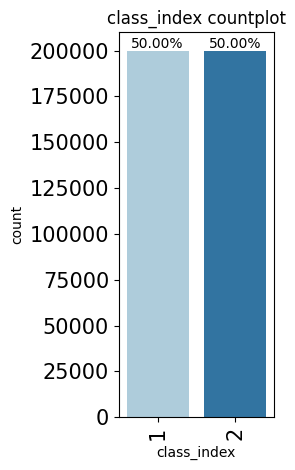

In [ ]:
labeled_barplot(data,'class_index', perc=True)

- this shows that the dataset is balanced

In [ ]:
#drop 50% of the dataset due to computational limitations
#Identify the number of classes
category = data['class_index'].nunique()

#Group the DataFrame by category and get the count
category_counts = data.groupby('class_index').size()

#Calculate the number of data points to select
num = int(0.5 * len(data))

#Calculate the desired number of samples from each class
num_per_category = int(num / category) #this is the number of samples we want from each sub category

#Randomly select 'num_per_class' samples from each subcategory
random_samples = data.groupby('class_index').apply(lambda x: x.sample(n=num_per_category, random_state=42)).reset_index(drop=True)

#save the randomly selected subset
data = random_samples.copy()

#randomize the data
data = data.sample(n = len(data))
#view a sample
data

,class_index,review_text
36863,1,"(...)So... a new album from britney spears. All i can say is this.IT SUCKS!I mean come on poeple why are you buying this! It's the same as all her other albums,and really, if you actually LIKE this crap you should be locked up for a long time.Here's some GOOD music1 Fiona Apple2 Charlotte Martin3 U24 Stevie Ray Vaughn5 Nelly Furtado6 Eminem7 Usher8 Jojo9 Michelle Branch10 Destinys ChildI recommend you not get this. If youdo, you're in danger of going insane."
134943,2,I find Pierce Brosan as the best Bond and this film is anouther great Bond movie. Die Anouther Day has a new bond girl (Jinx) which Hallie Berry plays. She finds herself in a lot of trouble which Bond has to always protects. Bonds villians are Gustav Graves and Zao.
187085,2,you will find that many sounds take your mind away!. A magic moment with Stevie.
124509,2,"We bought 2 of these books for our 1 1/2 year old son who LOVES tractors. He now can't go anywhere without them. I just ordered the other 4 to complete the collection since as much as he carries them around and sits quietly (alone) and looks at them, they are sure to be WELL worn in a few months. He is already recognizing the animals and mimicing the animal sounds from looking at the pictures. Our 4 year old daughter (who is HUGE princess fan)loves to climb up in the chair and listen to the stories as well!"
152292,2,"This is a great CD. Contact Jimmy at CSP Records and he will save you money on this CD. I got it for under $20 in March, 2011."
...,...,...
145865,2,"I needed extra storage in my garage so i was looking for something that would hang from the ceiling as I had plenty of space above the garage doors. At first I was planning on building somethign myself, but when I found these HyLoft systems, I immediately bought 5 of them to install in my garage. As always, Amazon shipped them for free based on my choice and low and behold showed up 2 days later. So, then I had to decide the spacing and such for the install. Once I did that, I got out my ladder the few tools required for the install and set to work. In less than 45 minutes, I had the first one up. By the time I was done with the fifth one I purchased, I was down to 30 minutes per install. So now I have cleared the floor in my garage by throwing everything up on these storage systems. I would definitely recommend these for ease of installation and what appears to be something that will hold up over time."
173794,2,"I read the reviews and was reluctant to buy this for my one year old grand daughter. But this is an excellent toy. It was not difficult to assemble as I had heard. No sharp edges. No need to drill any holes. It is a great toy. It lets kids use their imagination. No lights and sounds, other than in the CB radio. It is sturdy and she hasn't gotten out of it except to bring her other toys into it. She loves her daddy, who is a firefighter, to push her around. This is a toy that will grow with her. I have 8 children and 17 grand children, and I have bought cozy coupes before and they last. don't hesitate to buy this!"
35745,1,Product arrived on time as advertised with no problems. Shipping was outrageous. I didn't note it at the time and would not have ordered if I had of noticed. That was my fault. For $10 shipping I would have thought that it would have been hand delivered within an hour. They made good money on that one.
91515,1,"First of all I'm a book worm. Most of the time any book is good....This one however I could not understand....Not only it's a sort of a boring topic, but the writer is just showing off all the difficult words she knows, I'm not talking about the medical terms...The research she did is good, but written in a way to make you put the book down after reading one page or pulling up words from the dictionary every minute or so...-Tired and still trying to put this puzzle together from Cleveland, OH..???"


In [ ]:
#check for missing values
data.isnull().sum()

class_index    0
review_text    0
dtype: int64

- there are no missing values

### Rename the values of the class_index columns.
- originally, class 1: Negative review; class 2: Positive review.
- i will rename the values as follows:
- {class 2 will be renamed to 0}, hence, zero will be the class for positive reviews, while 1 will be the class for negative reviews.

In [ ]:
data['class_index'].dtype

dtype('int64')

In [ ]:
def class_changer(val):
  """
  changes the class 2 (negative class) to zero
  """
  if val == 1: #if the value of the column is 1 i.e negative review
    val = 1 #retain the value as 1
    return int(val) #return it as 1

  elif val == 2: #if the value is 2 i.e positive value
    val = 0 #change it 0
    return int(val)  #retrun it as 0

In [ ]:
#apply the function
data['class_index'] = data['class_index'].apply(class_changer)

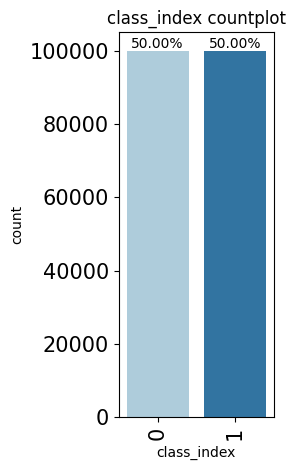

(199958, 2)


In [ ]:
#view the distribution again
labeled_barplot(data,'class_index', perc=True)
print(data.shape)

- the dataset contains 199,958 rows and 2 columns.
- it is a relatively balanced data

# NLP Text Preprocessing
the following cleaning method will be implemented
- Remove Contractions
- remove unwanted characters
- lowercase the reviews
- remove stopwords
- apply lematization
- display wordcloud view of frequent words



## Remove Contractions

In [ ]:
!pip install contractions

In [ ]:
data.head()

,class_index,review_text
36863,1,"(...)So... a new album from britney spears. All i can say is this.IT SUCKS!I mean come on poeple why are you buying this! It's the same as all her other albums,and really, if you actually LIKE this crap you should be locked up for a long time.Here's some GOOD music1 Fiona Apple2 Charlotte Martin3 U24 Stevie Ray Vaughn5 Nelly Furtado6 Eminem7 Usher8 Jojo9 Michelle Branch10 Destinys ChildI recommend you not get this. If youdo, you're in danger of going insane."
134943,0,I find Pierce Brosan as the best Bond and this film is anouther great Bond movie. Die Anouther Day has a new bond girl (Jinx) which Hallie Berry plays. She finds herself in a lot of trouble which Bond has to always protects. Bonds villians are Gustav Graves and Zao.
187085,0,you will find that many sounds take your mind away!. A magic moment with Stevie.
124509,0,"We bought 2 of these books for our 1 1/2 year old son who LOVES tractors. He now can't go anywhere without them. I just ordered the other 4 to complete the collection since as much as he carries them around and sits quietly (alone) and looks at them, they are sure to be WELL worn in a few months. He is already recognizing the animals and mimicing the animal sounds from looking at the pictures. Our 4 year old daughter (who is HUGE princess fan)loves to climb up in the chair and listen to the stories as well!"
152292,0,"This is a great CD. Contact Jimmy at CSP Records and he will save you money on this CD. I got it for under $20 in March, 2011."


In [ ]:
import contractions

In [ ]:
def contraction_solver(reviews):
    """
    this function fixes the contractions found in the sentence and returns a review with no contractions.
    reviews: string of words
    """
    fixed_reviews = contractions.fix(reviews)
    return fixed_reviews

In [ ]:
data['review_text'] = data['review_text'].apply(contraction_solver)

## remove unwanted characters

In [ ]:
def review_cleaner(reviews):
    """
    this function removes unwanted characters such as: digits and punctuation marks, extra
    whitespaces & special charcatersfound in reviews.
    it will return only uppercase and lowecased alphabets.
    reviews: string of words
    """
    cleaned_review = re.sub(pattern = "[^a-zA-Z]", repl=" ", string=reviews) #removes digits and punctuation marks
    cleaned_review = re.sub(pattern = "\s+", repl=" ", string=cleaned_review)#removes extra whitespaces
    return cleaned_review

In [ ]:
data['review_text'] = data['review_text'].apply(review_cleaner)

## lowercase the reviews

In [ ]:
def lowercase_returner(reviews):
    """
    returns a lowercased string of reviews.
    reviews: string of words
    """
    #step1: lowercase each word in the list of tokens
    lowercased_review = [review.lower() for review in reviews.split()]
    #step 2: join the words together
    text = " ".join(lowercased_review)
    #step 3: return text
    return text

In [ ]:
data['review_text'] = data['review_text'].apply(lowercase_returner)

## remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#step1: import corpus
from nltk.corpus import stopwords

#step2: initializa stopwords found in the english languague so far
stopword = stopwords.words('english')

#step3: define a function to remove stopwords found in the review
def stopword_deleter(review):
    """
    the function removes stopwords found in the review and returns the remaining word
    review: string of words
    """
    #remove the word if the word is a stopword
    cleaned_review = [text for text in review.split() if text not in stopword]

    #join the remiaining words back together
    cleaned_review = " ".join(cleaned_review)

    #return the cleaned_review
    return cleaned_review

#step4: apply the function to the review text
data["review_text"] = data.apply(lambda x: stopword_deleter(x['review_text']), axis=1)

## apply lematization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#step1: import wordnetlemmatizer(wnl)
from nltk.stem import WordNetLemmatizer

#step2: initialize the wnl
lemm = WordNetLemmatizer()

#step3: define a function to apply lemmatization to words found in review
def lemmatize_reviews(review):
    """
    the function lemmatize the words in the review
    review: string of words
    """
    #remove the word if the word is a stopword
    cleaned_review = [lemm.lemmatize(text) for text in review.split()]

    #join the remiaining words back together
    cleaned_review = " ".join(cleaned_review)

    #return the cleaned_review
    return cleaned_review

#step4: apply the function to the review text
data["review_text"] = data.apply(lambda x: lemmatize_reviews(x['review_text']), axis=1)

## Remove Punctuations

In [ ]:
def punctuation_remover(review):
    """
    removes any punctuation found in the review.
    """
    cleaned_review = [word for word in review.split() if word not in string.punctuation]

    #join the remiaining words back together
    cleaned_review = " ".join(cleaned_review)

    return cleaned_review

In [ ]:
data['review_text'] = data['review_text'].apply(punctuation_remover)

In [ ]:
#view the data
data.sample(10)

,class_index,review_text
2323,1,bootleg picture scanned poorly reprinted save dollar
147666,0,admire christopher guest wanting bring absolutely everyone ever met film bad enough everyone likely everyone wound cutting room floor saved dvd ton terrific super talented performer much character development leave wondering fill blank guest gone directly dvd hour film said go see anyway
64448,1,zero star option would choose production terrible girl terrible honestly genre ruled reggaeton go wild series well gatas sandunguera video dominican republic video sexy latinas dance ass basically like strip club disk girl dance turnon also music really bad zero reggaeton dvd say reggaeton package music dvd sound like bad elevator music please buy piece garbage
121573,0,book good stay till l finishit stephen horn great story teller love factthat take place first person regetreading book non stop thriller cannot waitfor next book
76426,1,always thought soundtrack motion picture would include music played motion picture apparently case really looking forward hearing carol bell white christmas drifter cd song guess secret look word various artist ensure getting soundtrack cd contains music written especially movie better watch better cry
49004,1,ordered thinking pure vitamin e oil advertised oil ingredient even though write list ingredient vitamin e oil rather disappointed sure worth returning price purchased make allergen free lip gloss contains almond wheat allergic waste rather perturbed usual amazon experience
6730,1,recrystallization phenomenon well known long time know visualize feel effect importance clearly different model latest development technology development new alloy
132376,0,good charlotte new second album young hopeless amazing although get song internet month released wrote song order keep fan happy surprise new sound opinion new faverite cd ever listened go pick dissappointed
18157,1,world hyping movie amateurish irritating watch worse home movie telephoto without jitter control trial watch script consists almost entirely f k variation combination wearing story non existent unless afraid dark forest even stretch cult movie loved emulate actor embarrassment school produced dropout waste time resource
35757,1,knife opener penetrate can therefore open edge appear different height probably contributes problem never occurred would unsatisfactory unpacked discarded box packing otherwise would returned unhappy cutter especially much cost shop around another kind would recommend


# Display WordCloud

In [ ]:
def WordCloudGenerator(data, class_index):
    """
    this function generates a word cloud based on the specified comment class
    data: dataframe
    class_index: category {1: negative, 2: positive}
    """
    #step1: define the category
    reviews = data[data['class_index'] == class_index] #this will return a subset of the data with specified class_index

    #step2: join the words in the reviews text
    joined_reviews = " ".join(reviews['review_text'])
    #this will join the reviews together

    #step3: tokenize the words into a list of words
    tokens = " ".join([reviews for reviews in joined_reviews.split()])

    #step4: intialize the wordcloud
    wc = WordCloud(stopwords=STOPWORDS, random_state=14, width=3000, height=2500,).generate(tokens)

    #set the figure
    plt.figure(1, figsize=(12,12))

    #display the wordcloud image
    plt.imshow(wc, interpolation='bilinear')

    #off the axis
    plt.axis('off')

    #show the plot
    plt.show()


## Display wordcloud for negative reviews, class 1.

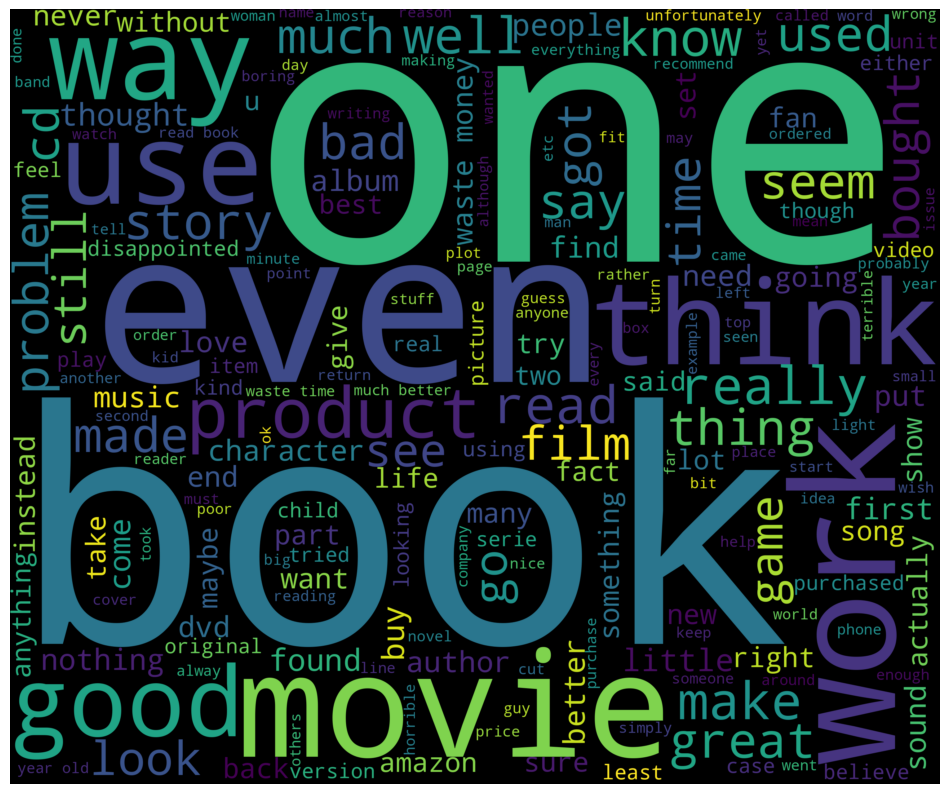

In [ ]:
wc1 = WordCloudGenerator(data, 1)
wc1

# Display wordcloud for Positive reviews, class 0.

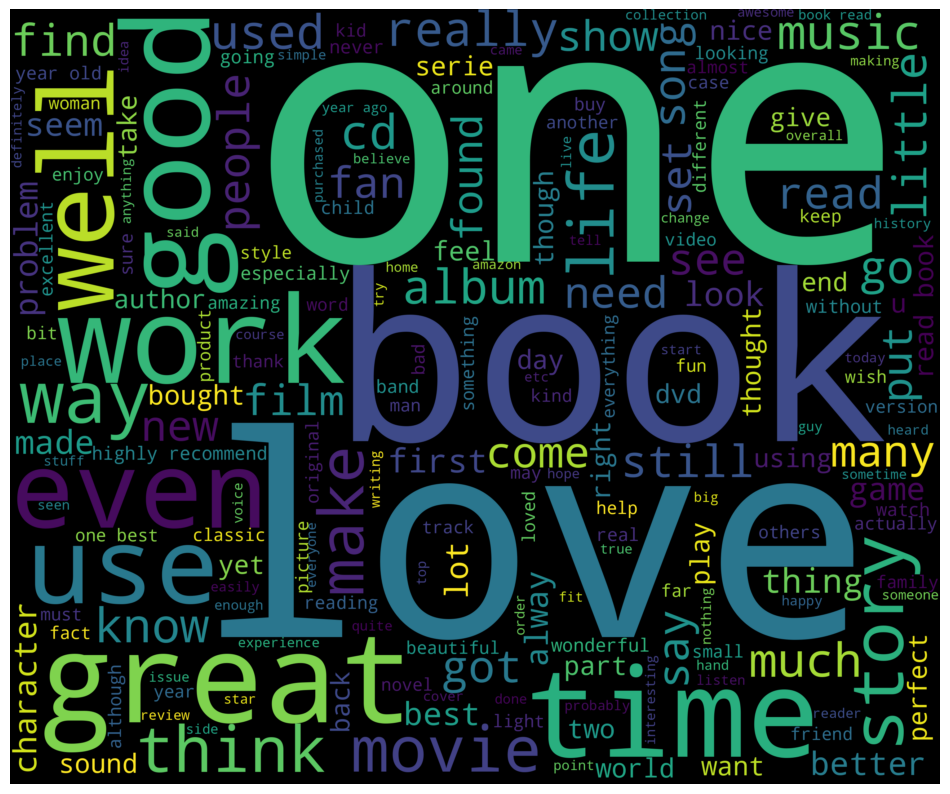

In [ ]:
wc2 = WordCloudGenerator(data, 0)
wc2

# Save the clean data

In [ ]:
data.to_csv('/content/drive/MyDrive/amazon_project/amazon_dataset_cleaned.csv', index=False)

 # Model Building

 - firstly, i would get vectorize the reviews by implementing CountVectorize (BOW) and TF-IDF using max_features as 1000 due to computational expenses as well as reducing sparsity problem
 - the vectors will be used to train the decision tree and ensemble based models.
 - their performances will be observed

In [ ]:
# vectorize the reviews
def review_vectorizer(data, review_column, BOW=True, TFIDF=True, max_feat=1000):
    """
    returns bow and tfidt vectors of the comments
    if tfidf=False, only bow vectors will be returned with max_feat
    df : dataframe
    column: specified comment column name
    """
    BW = CountVectorizer(max_features=max_feat)
    bow_vectors = BW.fit_transform(data[review_column]).toarray()

    TF = TfidfVectorizer(max_features=max_feat)
    tf_vectors = TF.fit_transform(data[review_column]).toarray()

    if BOW == True and TFIDF != True:
        return bow_vectors

    elif BOW == True and TFIDF == True:
        return bow_vectors, tf_vectors

In [ ]:
#obtain the vectors
bow_vectors, tf_vectors = review_vectorizer(data, 'review_text')

In [ ]:
bow_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tf_vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1873921 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.09965402,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## split the data

In [ ]:
#define features for BOW
X = bow_vectors
#define target
y = data['class_index']

#split into BOW train set(80%), validation set and test set (10% each)
x_train_b, x_V, y_train_b, y_V = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
x_val_b, x_test_b, y_val_b, y_test_b = train_test_split(x_V, y_V, train_size=0.5, random_state=10, stratify=y_V)


In [ ]:
#define features for TF-IDF
X = tf_vectors
#define target
y = data['class_index']

#split into TF-IDF train set(80%), validation set and test set (10% each)
x_train_idf, x_V, y_train_idf, y_V = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
x_val_idf, x_test_idf, y_val_idf, y_test_idf = train_test_split(x_V, y_V, train_size=0.5, random_state=10, stratify=y_V)


# Implementing Decision tree

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
def model_trainer(algorithm, X, y):
    """
    trains the model with given parameters
    algorithm: algorithm
    X: x_train scaled
    y = target
    """
    trained_model = algorithm.fit(X, y) #train the algorithm

    prediction = trained_model.predict(X)  #making prediction on the train data

    acc = accuracy_score(y, prediction)  #make predictions
    #print(f"train accuracy : {acc}")  #print accuracy
    print("train accuracy : {:.3f}".format(acc))
    return trained_model   #return trained model

def perf_evaluator(model, x_test, y_test):
    #make predicition
    y_pred = model.predict(x_test)
    #print classification report
    print(classification_report(y_test, y_pred))

    #obtain a confusion matrix
    conf = confusion_matrix(y_test, y_pred)
    confds = ConfusionMatrixDisplay(conf, display_labels=['positive', 'negative'])
    confds.plot()

def train_and_evaluate(algo, x_train, y_train, x_val, y_val):
    """
    trains a model, test on the val set and returns the classification report
    """
    model = model_trainer(algo, x_train, y_train)
    performance = perf_evaluator(model, x_val, y_val)

    return performance


train accuracy : 0.672
              precision    recall  f1-score   support

           0       0.75      0.51      0.60      9998
           1       0.63      0.83      0.71      9998

    accuracy                           0.67     19996
   macro avg       0.69      0.67      0.66     19996
weighted avg       0.69      0.67      0.66     19996



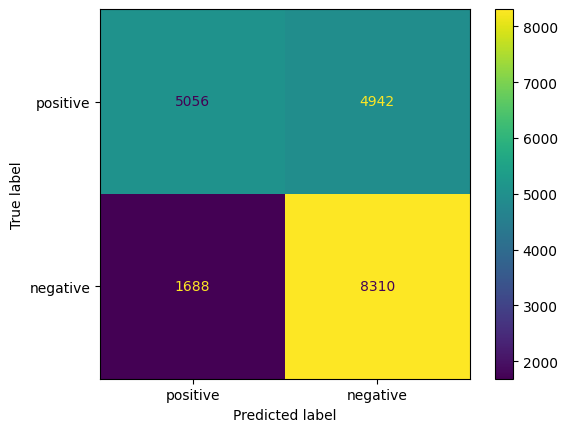

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=6)

#decision tree model performance on the bow vectors
bow_performance = train_and_evaluate(d_tree, x_train_b, y_train_b, x_val_b, y_val_b)

### Performance summary
- 63% of the reviews predicted to be negative reviews (class 1) were correct.
- 83% of the negative reviews in the dataset were correctly classified as negative.


train accuracy : 0.671
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      9998
           1       0.62      0.84      0.72      9998

    accuracy                           0.67     19996
   macro avg       0.69      0.67      0.66     19996
weighted avg       0.69      0.67      0.66     19996



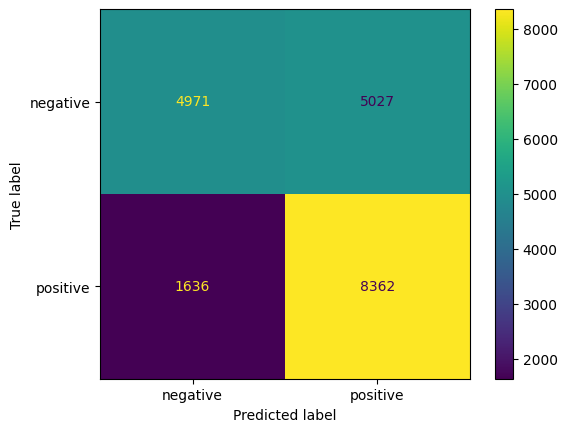

In [ ]:
#decision tree model performance on the tf-idf vectors
tf_performance = train_and_evaluate(d_tree, x_train_idf, y_train_idf, x_val_idf, y_val_idf)
tf_performance

### Performance summary
- 62% of the reviews predicted to be negative reviews (class 1) were correct.
- 84% of the negative reviews in the dataset were correctly classified as negative.



### Evaluate the performance of the decision tree model further by reducing the max_features of bow and tf-idf vectorizer to 500.
- this is done to reduce sparsity problem.

In [ ]:
#obtain the vectors having of words with
bow_vectors_500, tf_vectors_500 = review_vectorizer(data, 'review_text', max_feat=500)

## split the data

In [ ]:
#define features for BOW
X = bow_vectors_500
#define target
y = data['class_index']

#split into BOW train set(80%), validation set and test set (10% each)
x_train_b500, x_V, y_train_b500, y_V = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
x_val_b500, x_test_b500, y_val_b500, y_test_b500 = train_test_split(x_V, y_V, train_size=0.5, random_state=10, stratify=y_V)


In [ ]:
#define features for TF-IDF
X = tf_vectors_500
#define target
y = data['class_index']

#split into TF-IDF train set(80%), validation set and test set (10% each)
x_train_idf500, x_V, y_train_idf500, y_V = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
x_val_idf500, x_test_idf500, y_val_idf500, y_test_idf500 = train_test_split(x_V, y_V, train_size=0.5, random_state=10, stratify=y_V)


train accuracy : 0.672
              precision    recall  f1-score   support

           0       0.75      0.51      0.60      9998
           1       0.63      0.83      0.71      9998

    accuracy                           0.67     19996
   macro avg       0.69      0.67      0.66     19996
weighted avg       0.69      0.67      0.66     19996



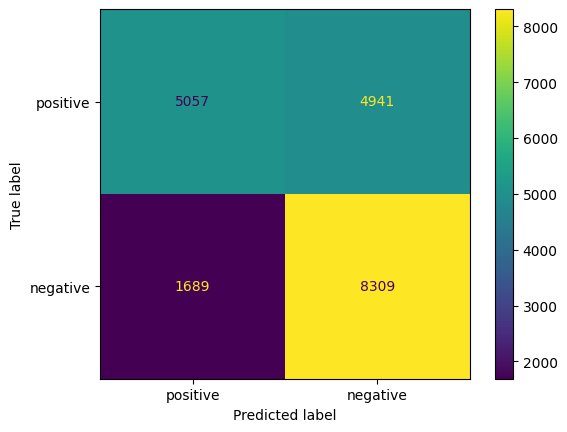

In [ ]:
#evaluate performance
d_tree = DecisionTreeClassifier(max_depth=6)

#decision tree model performance on the bow vectors
bow_performance = train_and_evaluate(d_tree, x_train_b500, y_train_b500, x_val_b500, y_val_b500)

### Performance summary
- 63% of the reviews predicted to be negative reviews (class 1) were correct.
- 83% of the negative reviews in the dataset were correctly classified as negative.


train accuracy : 0.671
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      9998
           1       0.63      0.83      0.71      9998

    accuracy                           0.67     19996
   macro avg       0.69      0.67      0.66     19996
weighted avg       0.69      0.67      0.66     19996



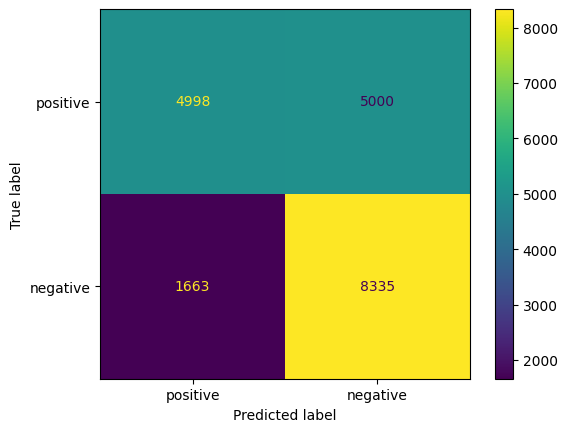

In [ ]:
#decision tree model performance on the tf-idf vectors
tf_performance = train_and_evaluate(d_tree, x_train_idf500, y_train_idf500, x_val_idf500, y_val_idf500)
tf_performance

### Performance summary
- 63% of the reviews predicted to be negative reviews (class 1) were correct.
- 83% of the negative reviews in the dataset were correctly classified as negative.


#### similar performance was obtained when the max_features was reduced from 1000 to 500. Hence, the remainder of the project involving such vectors will be executed using the vectors derived when max_feature = 500.

# Ensemble Model

## GradientBoosting

In [ ]:
#import gradientboosting classifier algoritm
from sklearn.ensemble import GradientBoostingClassifier


train accuracy : 0.762
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      9998
           1       0.74      0.80      0.77      9998

    accuracy                           0.76     19996
   macro avg       0.76      0.76      0.76     19996
weighted avg       0.76      0.76      0.76     19996



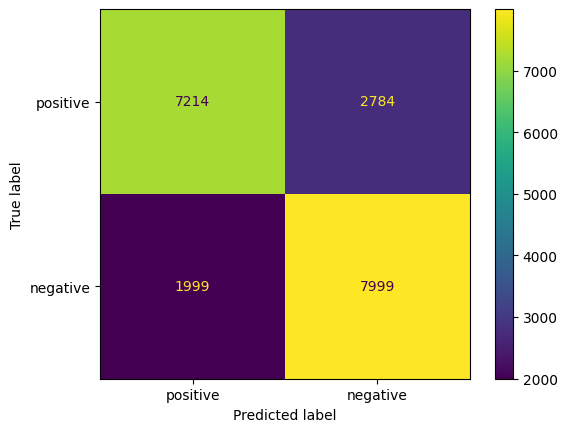

In [ ]:
#initialize the model
grb = GradientBoostingClassifier(n_estimators=100,random_state=0)

#gradientboostimg model performance on the bow vectors
bow_performance = train_and_evaluate(grb, x_train_b500, y_train_b500, x_val_b500, y_val_b500)
bow_performance

### Performance summary
- 74% of the reviews predicted to be negative reviews (class 1) were correct.
- 80% of the negative reviews in the dataset were correctly classified as negative.


train accuracy : 0.764
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      9998
           1       0.74      0.80      0.77      9998

    accuracy                           0.76     19996
   macro avg       0.76      0.76      0.76     19996
weighted avg       0.76      0.76      0.76     19996



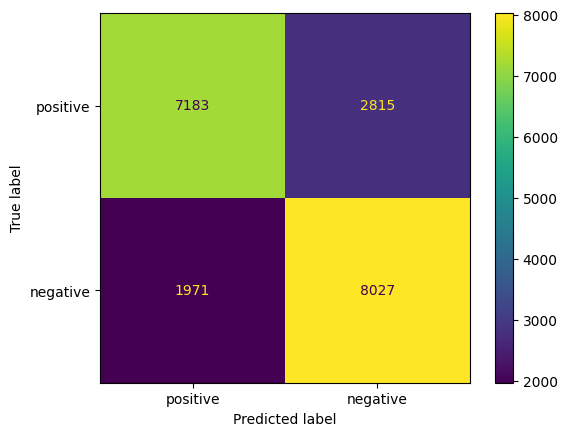

In [ ]:
#gradientboostimg model performance on the tf-idf vectors
tf_performance = train_and_evaluate(grb, x_train_idf500, y_train_idf500, x_val_idf500, y_val_idf500)
tf_performance

### Performance summary
- 74% of the reviews predicted to be negative reviews (class 1) were correct.
- 80% of the negative reviews in the dataset were correctly classified as negative.


# Unsupervised Model
- a copy of the dataset will be used to implement unsupervised learning methods and the performance will be evaluated.
## Vader Sentiment


In [ ]:
data2 = data.copy() #make a copy of the data

In [ ]:
def metrics_eval(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['positive', 'negative'], yticklabels = ['positive', 'negative'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [ ]:
#define a function to implement vader sentiment polarity score analysis
def vader_sentiment(text):
    """
    returns the compound polarity score of the text.

    """
    #compute the polarity score of a text
    pol_score = VAD.polarity_scores(text)

    #select the compund score
    compound_score = pol_score['compound']

    #if compound score < 0, if review is seen as negative
    if compound_score < 0:
        #return it as 1
        return 1
    #if compound score >= 0, if review is seen as positive
    elif compound_score >= 0:
        #return it as 0
        return 0

In [ ]:
#import relevant package
from nltk.sentiment import vader

#intialize the vader sentiment
VAD = vader.SentimentIntensityAnalyzer()

              precision    recall  f1-score   support

           0       0.59      0.93      0.72     99979
           1       0.84      0.36      0.50     99979

    accuracy                           0.65    199958
   macro avg       0.72      0.65      0.61    199958
weighted avg       0.72      0.65      0.61    199958



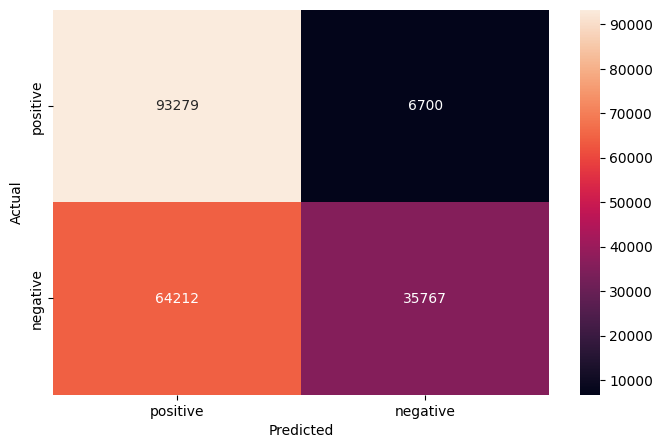

In [ ]:
#apply the function to 'review_text'
data2['vader_score'] = data2['review_text'].apply(vader_sentiment)

#measure the performance
metrics_eval(data2['class_index'], data2['vader_score'])

### Performance summary
- 84% of the reviews predicted to be negative reviews (class 1) were correct.
- 36% of the negative reviews in the dataset were correctly classified as negative.

- 93% of the positive reviews in the dataset were correctly classified as positive.


## TextBlob

In [ ]:
#import relevant package
from textblob import TextBlob

def Text_B(text):
    """
    returns class 1 or 0 depending on the polarity score obtained from textblob sentiment analysis

    text: 'comment_text'
    """
    #obtain polarity score
    pol = TextBlob(text).sentiment.polarity

    #if score < 0, negative review
    if pol < 0:
    #return 1
        return 1
    #if score >= 1, positive review
    elif pol >= 0:
    #return 0
        return 0

              precision    recall  f1-score   support

           0       0.59      0.94      0.73     99979
           1       0.86      0.36      0.51     99979

    accuracy                           0.65    199958
   macro avg       0.72      0.65      0.62    199958
weighted avg       0.72      0.65      0.62    199958



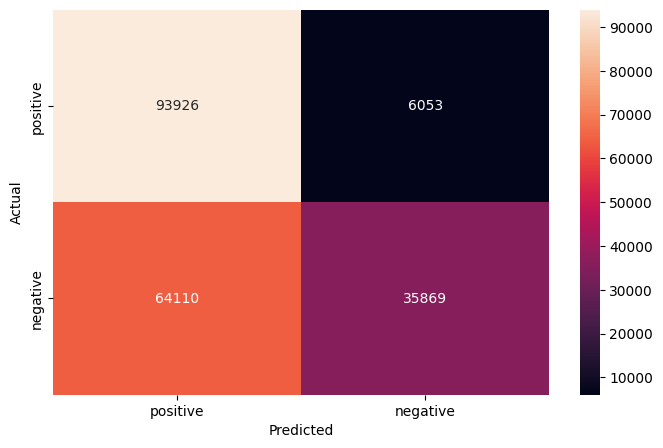

In [ ]:
#apply the function to 'review_text'
data2['tb_score'] = data2['review_text'].apply(Text_B)

#measure the performance
metrics_eval(data2['class_index'], data2['tb_score'])

### Performance summary
- 86% of the reviews predicted to be negative reviews (class 1) were correct.
- 36% of the negative reviews in the dataset were correctly classified as negative.

- 94% of the positive reviews in the dataset were correctly classified as positive.


# GloVe

#### the implementation of Glove model, will be done as follows:
- step1: define the path
- step2: read the glove file.txt
- step3: select the features
- step4: split the data
- step5: obtain glove representation for each set
- step6: measure the performance on the GradientBoosting model

#### Please note that the file used here is the "Glove twitter 100d".

In [ ]:
local_glv_path = "/Users/user/Downloads/glove/glove.twitter.27B.100d.txt"

cloud_glv_path = "/content/drive/MyDrive/data_science/glove.twitter.27B.100d.txt"

embeddings_index = {}

f = open(local_glv_path, encoding='utf8')

for line in f:
    #splitting each line
    values = line.split()

    word = values[0]

    coefs = np.array(values[1:], dtype='float32')

    embeddings_index[word] = coefs

f.close()

print("found %s word vectors" % len(embeddings_index))

found 1193514 word vectors


In [ ]:
from nltk.tokenize import word_tokenize

def glove_emb(sentences):
    #tokenize the sentence
    tokens = word_tokenize(sentences)
    #create an empty list to store word vectors
    emb = []
    for word in tokens:
        try:
            #if word is in glove vocab
            emb.append(embeddings_index[word])
        except:
            #to avoid errors skip it
            continue

    embeddings = np.sum(emb, axis=0) #sum because some words may not
#be present in the glove vocab
    #return embeddings

    if type(embeddings) != np.ndarray:
        return np.zeros(100)
    else:
        return embeddings / np.sqrt((embeddings ** 2).sum())

In [ ]:
#step3: select features and target
X = data['review_text']
y = data['class_index']


#step4: split the dataset into train, validation and test
x_train, x_Ve, y_train, y_Ve = train_test_split(X, y, random_state=0,stratify=y,
                                                   test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_Ve, y_Ve, random_state=0,stratify=y_Ve,
                                                   test_size=0.5)


In [ ]:
#step5: obtain glove representation for each set
x_train_glv = [glove_emb(sent) for sent in x_train]
x_val_glv = [glove_emb(sent) for sent in x_val]
x_test_glv = [glove_emb(sent) for sent in x_test]

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      9998
           1       0.75      0.77      0.76      9998

    accuracy                           0.75     19996
   macro avg       0.75      0.75      0.75     19996
weighted avg       0.75      0.75      0.75     19996



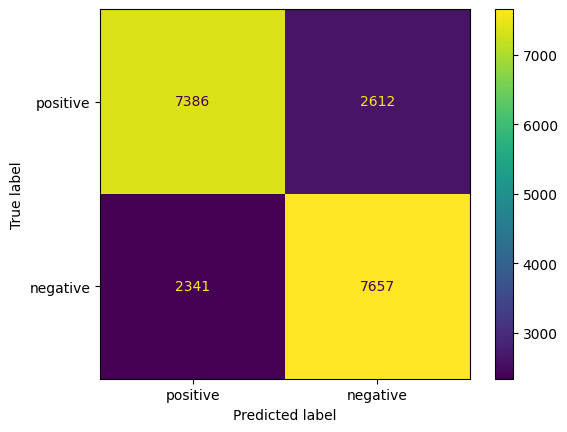

In [ ]:
#train and evaluate the GradientBoosting model
grb = GradientBoostingClassifier(n_estimators=100,random_state=0)

grb_m = grb.fit(x_train_glv, y_train)

grb_performance = perf_evaluator(grb_m, x_val_glv, y_val)
grb_performance

### Performance summary
- 75% of the reviews predicted to be negative reviews (class 1) were correct.
- 77% of the negative reviews in the dataset were correctly classified as negative.

- 74% of the positive reviews in the dataset were correctly classified as positive.


# Model Development using Dense Vectors.
#### the following steps will be carried out in implementing Word2Vec, skipgram and FastText
- step1: import relevant packages
- step2: because word2vec does not operate similar way as count vectorizer, I get all the text inside  a single list.
- step3: train the word2vec model
- step4: build a function that will obtain the word embeddings.
    1. every sentence in each index or each row has words
    2. each of these words have a dense representation of specified vector size, example, 100 vectors
    3. thus each sentence has a many dense representation of 100 vectors per word that it contains
    4. these representations are averaged for each row (for each word in the sentence) to obtain 100 dense vector representations that attempt to explain that sentence.
    5. at the end, we will see that each row (sentence) is represented by a vector of 100 dimensions in this case
- step5: split the dataset
- step 6: train the GradientBoosting model.

### Word2Vec (CBOW)


In [ ]:
data.head()

,class_index,review_text
73183,1,bought mug cannot tell happened one day heated coffee reached microwave ouch handle hot could pull mug used low wattage well high wattage oven thing took place son us cold drink useless
72991,1,reading book reminded like raising hyperactive hypersensitive nephew whined day left womb stopped feeling sorry since charles moose lukewarm regurgitation event u dc metro region suffered missed opportunity redeem foible tense three week addition serf insult fellow law enforcement officer press victim family public large take much research realize person permanent chip shoulder perhaps someone ignored cost better representation three week entailed people region country probably come one several book released subject quality writing worthy montgomery college student time
98220,1,music much much cheaper say cd plus whole disc extra like cheaper
102226,0,back porch bluegrass live almost excellent packaging first two dillards album onto one minute cd first great collection traditional bluegrass played superbly core dillards quartet second live concert later career added drummer fiddler album guitar string bass string banjo mandolin plus rodney harmonica tater sandy land give chaw baccer first class album live one added benefit dillards penchant self parody satire
21911,1,able finish book author irritating style sometimes roll eye read purple prose


In [ ]:
def word_embeddings_getter(model, token_list):
    """
    this function returns an array of word-embedding vectors for each token found in the list of tokens
    model: model
    token_list: each itirative sentence in a list

    """
    embeddings = []
    vocab = set(model.wv.key_to_index) #get vocabulary

    for token in token_list: #for each  word in token_list
        if token in vocab: #if the token (word) is found in the vocab
            embeddings.append(model.wv.get_vector(token))#append the word embeddings to the list

    if len(embeddings) == 0: #if length of embdding is zero
        return np.zeros(model.vector_size) #retrun a matrices of zeros with specifed dimension
    else:
        return(np.mean(embeddings, axis=0)) #return the mean of word embeddings for each word

def avg_word_emb(model, sentence):
    """
    this function applies the get_word_embeddings on each sentence
    model: model
    sentence: list containing a list of tokens
    """

    for token_list in sentence:

        word_embedding = [word_embeddings_getter(model, token_list) for token_list in sentence]
        #this will put every averaged word embedding for each sentence in a list hence we are able to retain the
        #shape of the array

        return np.array(word_embedding)

In [ ]:
#step1: import relevant packages
from gensim.models import Word2Vec, FastText

#step2: append all reviews in a list
review_list = []
for reviews in data['review_text']:
    tokens = reviews.split()
    review_list.append(tokens)

#step3: define the word2vec model of 100-Dimension
amazon_w2v_model = Word2Vec(sentences=review_list, min_count=5, vector_size=100)

In [ ]:
#save the word2vec model
amazon_w2v_model.save("/content/drive/MyDrive/data_science/w2v_model.model")

In [ ]:
#step4: get the word embeddings
w2v_emb = avg_word_emb(model=amazon_w2v_model, sentence=review_list)
#view the word embeddings
pd.DataFrame(w2v_emb)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.605029,0.246847,-0.140476,0.061369,0.065203,0.061357,-0.507795,0.527427,0.143290,-0.171335,...,0.524656,-0.457367,-0.807639,-0.095030,0.155385,0.350361,0.163815,-0.468811,0.417684,-0.020287
1,-0.021109,0.361991,-0.045299,-0.157135,0.248430,-0.235585,-0.033056,0.034099,0.028812,0.285115,...,0.000680,-0.072955,-0.134411,-0.042515,0.262336,0.828089,0.149314,0.171749,0.130347,-0.053102
2,0.010855,-0.413918,-0.918216,-0.956662,-0.637883,0.325583,-0.852431,-0.092800,0.244215,1.539974,...,0.051822,-0.631371,-0.697912,-0.717272,-0.571284,1.449914,0.400802,0.345678,-0.135815,-0.875421
3,-0.448353,-0.129206,-0.253040,-0.105799,-0.462767,0.336098,-0.417386,0.091067,0.055240,1.062600,...,0.297305,-0.659888,0.087680,-0.350546,-0.145974,0.342946,0.199090,-0.253762,-0.411252,-0.399062
4,0.121058,-0.095501,0.314090,0.388558,1.487291,0.255067,-0.580847,-0.561771,-0.968318,0.456582,...,0.316593,-0.128376,0.326750,0.561088,0.885236,0.858476,0.261009,-0.078352,0.240576,-0.064550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199953,-0.119097,0.070245,-0.312111,-0.189831,0.619414,0.024574,-0.406926,-0.157742,-0.532171,0.221139,...,-0.089345,-0.013456,0.413195,-0.059578,0.371951,0.701919,0.059225,0.169563,0.318653,-0.384373
199954,0.332439,0.138801,-0.473637,-0.117255,0.046204,-0.090089,-0.002578,0.348794,0.202018,0.085839,...,0.295550,-0.282179,-0.252987,-0.357100,-0.033086,0.322465,-0.214671,-0.342671,0.227648,0.011197
199955,-0.027488,-0.016045,-0.205929,-0.304267,0.565009,-0.058284,-0.264447,-0.006014,0.205166,0.020237,...,0.060187,0.234563,0.364271,-0.011348,0.087514,0.772270,-0.028489,-0.061033,-0.008515,-0.112640
199956,0.859480,-0.398404,0.052607,-0.129445,0.925936,0.738616,-0.768650,0.527043,0.345413,0.447798,...,0.556070,-0.584460,-1.113755,-0.314726,-0.006303,-0.018834,0.977373,-0.755403,0.099228,0.586133


In [ ]:
#select features and target
X = w2v_emb
y = data['class_index']

#split the dataset into train, validation and test
x_train, x_Ve, y_train, y_Ve = train_test_split(X, y, random_state=0,stratify=y,
                                                   test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_Ve, y_Ve, random_state=0,stratify=y_Ve,
                                                   test_size=0.5)


#### fitiing Decision Tree model on the w2v word embeddings

train accuracy : 0.733
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      9998
           1       0.74      0.71      0.72      9998

    accuracy                           0.73     19996
   macro avg       0.73      0.73      0.73     19996
weighted avg       0.73      0.73      0.73     19996



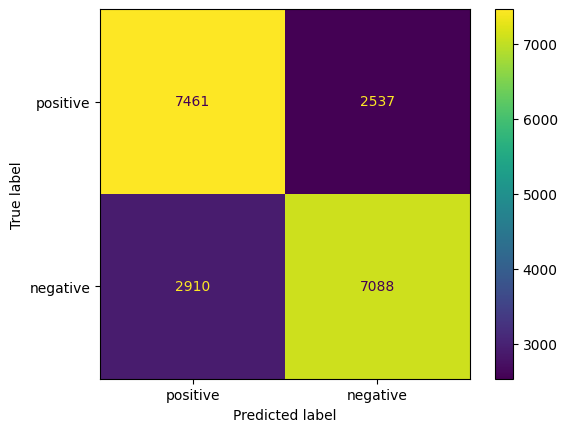

In [ ]:
#evaluate performance
d_tree = DecisionTreeClassifier(max_depth=6)

#decision tree model performance on the bow vectors
w2v_performance = train_and_evaluate(d_tree, x_train, y_train, x_val, y_val)
w2v_performance

### Performance summary
- 74% of the reviews predicted to be negative reviews (class 1) were correct.
- 71% of the negative reviews in the dataset were correctly classified as negative.

- 75% of the positive reviews in the dataset were correctly classified as positive.


#### fitiing GradientBoostingclassification model on the w2v word embeddings

train accuracy : 0.816
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      9998
           1       0.81      0.81      0.81      9998

    accuracy                           0.81     19996
   macro avg       0.81      0.81      0.81     19996
weighted avg       0.81      0.81      0.81     19996



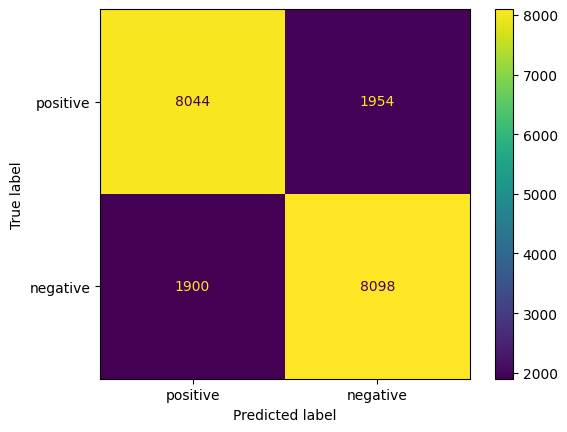

In [ ]:
#evaluate performance
grb_m = GradientBoostingClassifier(random_state=0)

#decision tree model performance on the bow vectors
w2v_performance_grb = train_and_evaluate(grb_m, x_train, y_train, x_val, y_val)
w2v_performance_grb

### Performance summary
- 81% of the reviews predicted to be negative reviews (class 1) were correct.
- 81% of the negative reviews in the dataset were correctly classified as negative.

- 80% of the positive reviews in the dataset were correctly classified as positive.


### Increasing the dimension of the word embeddings to 200 and observing the performance by using the GradientBoosting Classifier.

In [ ]:
#define the word2vec model of 200-Dimension
amazon_w2v_model_200 = Word2Vec(sentences=review_list, min_count=5, vector_size=200)

In [ ]:
#get the word embeddings
w2v_emb = avg_word_emb(model=amazon_w2v_model_200, sentence=review_list)

#view the word embeddings
pd.DataFrame(w2v_emb).head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.393152,0.367958,0.379568,0.178909,0.750163,0.033664,-0.273756,0.168090,-0.197126,0.254017,...,-0.127299,0.276423,-0.181677,0.186317,-0.064012,-0.093207,0.280252,0.129334,0.019793,0.249112
1,-0.065613,0.210941,0.088864,0.103857,0.003778,0.117290,0.211865,0.033574,-0.055281,0.026020,...,-0.032346,0.208269,-0.337439,-0.344656,0.303355,-0.326564,0.334041,-0.305804,0.092971,0.152683
2,-0.222544,0.486727,-0.755219,-0.033818,0.088109,-0.057561,-0.024624,-0.150103,0.308543,0.529187,...,-0.904823,0.879499,-0.732279,-0.449062,0.640934,-0.964427,-0.179615,-0.153752,-0.055019,-0.655215
3,-0.158289,0.340240,-0.070038,0.018239,0.217336,-0.155862,0.114485,0.083371,0.012764,0.492276,...,-0.142777,0.141464,-0.023661,-0.183368,0.328457,-0.189775,-0.260098,-0.120747,0.167294,-0.066462
4,-0.792071,0.574464,0.497695,0.234526,-0.238701,0.309761,0.098304,0.920021,0.193333,0.014532,...,-0.123081,0.618813,-0.008972,-0.977349,0.352030,0.022350,-0.314032,-0.277835,0.357916,-0.221885


In [ ]:
#select features and target
X = w2v_emb
y = data['class_index']

#split the dataset into train, validation and test
x_train, x_Ve, y_train, y_Ve = train_test_split(X, y, random_state=0,stratify=y,
                                                   test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_Ve, y_Ve, random_state=0,stratify=y_Ve,
                                                   test_size=0.5)


train accuracy : 0.821
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9998
           1       0.81      0.81      0.81      9998

    accuracy                           0.81     19996
   macro avg       0.81      0.81      0.81     19996
weighted avg       0.81      0.81      0.81     19996



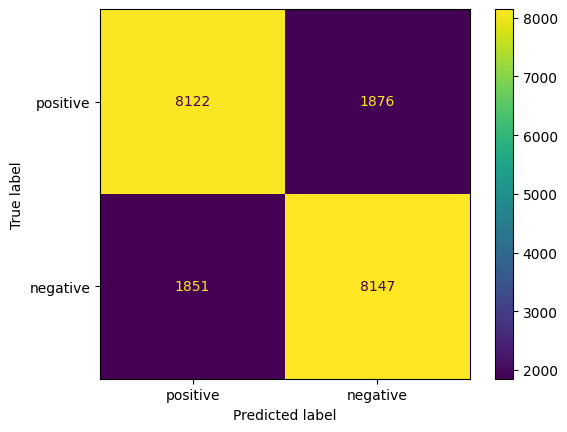

In [ ]:
#evaluate performance
grb_m = GradientBoostingClassifier(random_state=0)

#decision tree model performance on the bow vectors
w2v_performance_grb_200 = train_and_evaluate(grb_m, x_train, y_train, x_val, y_val)
w2v_performance_grb_200

### Performance summary
- 81% of the reviews predicted to be negative reviews (class 1) were correct.
- 81% of the negative reviews in the dataset were correctly classified as negative.

- 81% of the positive reviews in the dataset were correctly classified as positive.

#### the performance does not really show significant improvement hence the original 100-dimension will be used.

# Implementing SkipGram

In [ ]:
#specifying 'sg=1' implement skipgram
skip_g = Word2Vec(sentences=review_list, sg=1,vector_size=100)

In [ ]:
#get the word embeddings
sk_wb = avg_word_emb(model=skip_g, sentence=review_list)

In [ ]:
pd.DataFrame(sk_wb).head() #displays the word embeddings for the first 5 rows

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.067114,0.316682,0.036906,0.006290,-0.004235,-0.373163,0.009299,0.618362,-0.120126,-0.177148,...,0.484579,-0.044715,-0.168075,0.015671,0.279139,0.176964,0.181508,-0.177429,0.154443,-0.011590
1,-0.040964,0.294591,0.066494,0.032228,0.056695,-0.293525,0.026670,0.426234,-0.084258,-0.064661,...,0.251146,0.079534,-0.010380,0.030190,0.287649,0.159207,0.161549,-0.022396,0.109458,0.021964
2,-0.077698,0.155007,0.066850,0.030384,-0.093192,-0.370782,0.035588,0.468009,-0.180123,0.182999,...,0.273134,-0.107005,0.014423,0.022731,0.124608,0.120452,0.205444,-0.020388,0.042657,-0.077941
3,-0.101979,0.217901,-0.046642,0.072366,-0.124432,-0.187529,-0.007237,0.402397,-0.070702,0.071974,...,0.335931,-0.068809,0.043321,-0.066513,0.217479,0.067654,0.221984,-0.174123,-0.036652,0.024646
4,-0.088760,0.254611,0.290956,0.104874,0.085759,-0.177260,-0.061789,0.515637,-0.328029,-0.018138,...,0.368173,-0.015000,0.085257,0.160285,0.228936,0.096925,0.123164,-0.073645,-0.000590,0.102677


In [ ]:
#select features and target
X = sk_wb
y = data['class_index']

#split the dataset into train, validation and test
x_train_sg, x_Ve, y_train_sg, y_Ve = train_test_split(X, y, random_state=0,stratify=y,
                                                   test_size=0.2)
x_val_sg, x_test_sg, y_val_sg, y_test_sg = train_test_split(x_Ve, y_Ve, random_state=0,stratify=y_Ve,
                                                   test_size=0.5)


              precision    recall  f1-score   support

           0       0.81      0.80      0.81      9998
           1       0.81      0.82      0.81      9998

    accuracy                           0.81     19996
   macro avg       0.81      0.81      0.81     19996
weighted avg       0.81      0.81      0.81     19996



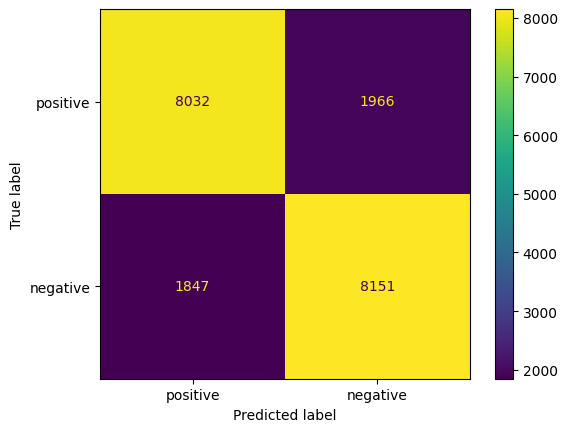

In [ ]:
#initialize the model
grb = GradientBoostingClassifier(n_estimators=100,random_state=0)

grb_m = grb.fit(x_train_sg, y_train_sg)

grb_sg_performance = perf_evaluator(grb_m, x_val_sg, y_val_sg)
grb_sg_performance

### Performance summary
- 81% of the reviews predicted to be negative reviews (class 1) were correct.
- 82% of the negative reviews in the dataset were correctly classified as negative.

- 80% of the positive reviews in the dataset were correctly classified as positive.

### despite using  100D word dimensions, a slightly better performance was obtained by implementing skipgram. Hence sg=1 will be used for FastText

# Implementing FastText

In [ ]:
#step1: import relevant packages
from gensim.models import FastText

In [ ]:
#step2: build the fasttext model
fast = FastText(sentences=review_list, sg=1, seed=10, word_ngrams=1)

In [ ]:
#save the fasttext model
fast.save("/content/drive/MyDrive/data_science/fasttext_amazon_model.model")

In [ ]:
#step3: get the word embeddings
fast_wv = avg_word_emb(model=fast, sentence=review_list)

pd.DataFrame(fast_wv).head() #displays the word embeddings for the first 5 rows

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.196425,-0.371057,0.022198,-0.198401,-0.067443,-0.070495,-0.162862,-0.057207,-0.275077,-0.132085,...,0.222392,0.204251,-0.352357,0.068053,0.114656,-0.001407,0.063912,-0.312349,0.111125,0.259934
1,0.197165,-0.244794,0.161826,-0.146630,0.162128,-0.040964,-0.098499,-0.004853,-0.223437,-0.142722,...,0.000514,0.059437,-0.299120,-0.030192,0.225138,-0.093005,-0.021092,-0.366096,0.145547,0.288366
2,0.212252,-0.216963,0.087678,-0.199662,0.085029,-0.077141,-0.244613,-0.072046,-0.270647,-0.097059,...,0.333306,0.059963,-0.279059,0.052967,0.207805,0.012867,-0.217479,-0.360535,0.065004,0.331050
3,0.181235,-0.201717,0.043985,-0.121184,0.017789,0.017597,-0.246509,0.131330,-0.204284,0.039948,...,0.038423,0.038755,-0.250064,-0.107795,0.118536,-0.020421,-0.164426,-0.410525,0.177553,0.226074
4,-0.029134,-0.328132,-0.004830,-0.265849,0.099218,0.163402,-0.063828,0.052675,-0.137072,-0.043977,...,-0.113641,0.071839,-0.425912,-0.068915,0.176927,-0.032656,-0.052684,-0.351603,0.183188,0.441737


In [ ]:
#step4: select features and target
X = fast_wv
y = data['class_index']


#step5: split the dataset into train, validation and test
x_train_ft, x_Ve, y_train_ft, y_Ve = train_test_split(X, y, random_state=0,stratify=y,
                                                   test_size=0.2)
x_val_ft, x_test_ft, y_val_ft, y_test_ft = train_test_split(x_Ve, y_Ve, random_state=0,stratify=y_Ve,
                                                   test_size=0.5)


train accuracy : 0.818
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9998
           1       0.81      0.81      0.81      9998

    accuracy                           0.81     19996
   macro avg       0.81      0.81      0.81     19996
weighted avg       0.81      0.81      0.81     19996



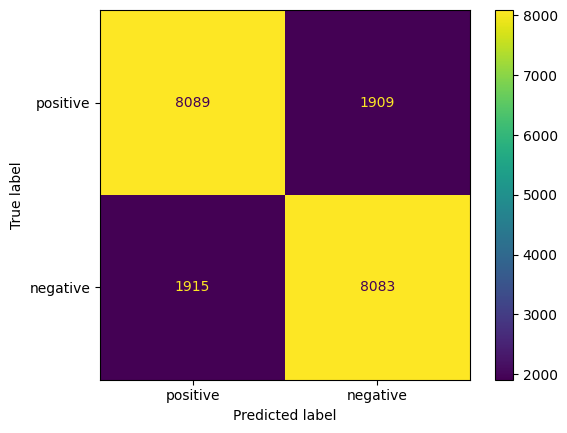

In [ ]:
#train and evaluate the GradientBoosting model
grb_m = GradientBoostingClassifier(n_estimators=100,random_state=0)

fast_performance = train_and_evaluate(grb_m, x_train_ft, y_train_ft, x_val_ft, y_val_ft)
fast_performance

### Performance summary
- 81% of the reviews predicted to be negative reviews (class 1) were correct.
- 81% of the negative reviews in the dataset were correctly classified as negative.

- 81% of the positive reviews in the dataset were correctly classified as positive.


# GloVe

#### the implementation of Glove model, will be done as follows:
- step1: define the path
- step2: read the glove file.txt
- step3: select the features
- step4: split the data
- step5: obtain glove representation for each set
- step6: measure the performance on the GradientBoosting model

#### Please note that the file used here is the "Glove twitter 100d".

In [ ]:
#step1: define a path
local_glv_path = "/Users/user/Downloads/glove/glove.twitter.27B.100d.txt"
cloud_glv_path = "/content/drive/MyDrive/data_science/glove.twitter.27B.100d.txt"

#step2: read the glove file
embeddings_index = {}

f = open(local_glv_path, encoding='utf8')

for line in f:
    #splitting each line
    values = line.split()

    word = values[0]

    coefs = np.array(values[1:], dtype='float32')

    embeddings_index[word] = coefs

f.close()

print("found %s word vectors" % len(embeddings_index))

In [ ]:
from nltk.tokenize import word_tokenize

def glove_emb(sentences):
    #tokenize the sentence
    tokens = word_tokenize(sentences)
    #create an empty list to store word vectors
    emb = []
    for word in tokens:
        try:
            #if word is in glove vocab
            emb.append(embeddings_index[word])
        except:
            #to avoid errors skip it
            continue

    embeddings = np.sum(emb, axis=0) #sum because some words may not
#be present in the glove vocab
    #return embeddings

    if type(embeddings) != np.ndarray:
        return np.zeros(100)
    else:
        return embeddings / np.sqrt((embeddings ** 2).sum())

In [ ]:
#step3: select features and target
X = data['comment_text']
y = data['toxic_class']


#step4: split the dataset into train, validation and test
x_train, x_V, y_train, y_V = train_test_split(X, y, random_state=0,stratify=y,
                                                   test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_V, y_V, random_state=0,stratify=y_V,
                                                   test_size=0.5)


In [ ]:
#step5: obtain glove representation for each set
x_train_glove = [glove_emb(sent) for sent in x_train]
x_val_glove = [glove_emb(sent) for sent in x_val]
x_test_glove = [glove_emb(sent) for sent in x_test]

In [ ]:
#train and evaluate the GradientBoosting model
grb = GradientBoostingClassifier(n_estimators=100,random_state=0)

grb_m = grb.fit(x_train_glove, y_train)

grb_performance = perf_evaluator(grb_m, x_val_glove, y_val)
grb_performance

### Performance summary
- 71% of the reviews predicted to be negative reviews (class 1) were correct.
- 70% of the negative reviews in the dataset were correctly classified as negative.

- 70% of the positive reviews in the dataset were correctly classified as positive.


## Implementing Recurrent Neural Network model

#### this will be implemented with the following steps:
- step1: import relevant package
- step2: tokenize the comments
- step3: pad the sequence of integers
- step4: split the dataset
- step5: build a recall score calculator or callable class
- step6: define callbacks
- step7: build the model
- step8: train and evaluate the model

## step2: Tokenize the comments


In [ ]:
#initialize the tokenizer
tokenizer = Tokenizer(num_words=1000)

#fit on data to update vocabulary
tokenizer.fit_on_texts(data['review_text'].values)

#convert text to sequence of integers
X_ve = tokenizer.texts_to_sequences(data['review_text'].values)



## step3: pad the sequence
- to reduce the problem of sparisity, instead of using maximum length of comment as the max length, i will obtain the descriptive stats of the length of all the comments as this will help me know the best padding length to use.

In [ ]:

str_length = []
#for each row in the data
for i in range(len(data['review_text'].values)):
  #append the length of each string to the list
  str_length.append(len(data['review_text'][i].split()))

#convert the list to a series
length_df = pd.Series(str_length)
#give a descriptive stats of it
print(length_df.describe())

count    199958.000000
mean         36.910511
std          21.432800
min           2.000000
25%          19.000000
50%          32.000000
75%          51.000000
max         160.000000
dtype: float64


- this shows that 75% of the texts contains no more than 51 words.
- the longest sentence contains 160 words.
#### I will set maxlen to 100 during padding so that the longest padding length will be at 100.

In [ ]:
#to ensure consistency in length
X = pad_sequences(X_ve, maxlen=100)
y = data['class_index']



## step4: split the dataset into train, validation and test

In [ ]:
x_train, x_Ve, y_train, y_Ve = train_test_split(X, y, random_state=0,stratify=y,
                                                   test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_Ve, y_Ve, random_state=0,stratify=y_Ve,
                                                   test_size=0.5)


## step5: build a recall score calculator or callable class

In [ ]:
#build a recall score callable metrics
from sklearn.metrics import recall_score
class Recall_Calculate(tf.keras.callbacks.Callback):
    #use the class constuctor to initialize the attributes

    def __init__(self, x, y):
        """
        self: object or instance of the class
        x: features
        y: target
        """
        #callback should be a child class of Recall_Calculate and retains the attributes
        super(Recall_Calculate, self).__init__()
        self.x = x
        self.y = y
        self.recall_values = []  # List to store recall values


    def on_epoch_end(self, epoch, logs=None):
        x = self.x
        y = self.y

        y_pred = self.model.predict(x)
        y_pred = tf.argmax(y_pred, axis=1).numpy()
        recall = recall_score(y, y_pred, average='weighted')
        self.recall_values.append(recall) #store the recall values after each epoch
        print(f"Validation Recall: {recall}")




## step6: define callbacks

In [ ]:
# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
est = EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=3)

#define modelcheckpoint to save best model
path = '/content/drive/MyDrive/data_science/project/amazon_model'
mcp = ModelCheckpoint(filepath = path, save_best_only=True, monitor='val_accuracy', mode='max')

#initialize the recall metrics
recall = Recall_Calculate(x_val, y_val)

## step7: build the model

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
def RNN_model(embedding_dims=100,output_sequence_length=100, hidden_dims=32):
    model = Sequential()

    model.add(Embedding(1000, output_dim=embedding_dims,input_length=X.shape[1]))

    model.add(SimpleRNN(units=hidden_dims))

    model.add(Dense(2, activation ='sigmoid'))
    model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

    return model

In [ ]:
rnn1 = RNN_model()

rnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 104,322
Trainable params: 104,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train_c = to_categorical(y_train)
y_val_c = to_categorical(y_val)
y_test_c = to_categorical(y_test)


## step8: train and evaluate the model

In [ ]:
rnn1_history = rnn1.fit(x_train, y_train_c, batch_size=64,
        validation_data= (x_val, y_val_c), epochs=5, callbacks=[est, mcp,recall])

Epoch 1/5
625/625 [==============================] - 6s 10ms/step
Validation Recall: 0.8247149429885977
2500/2500 [==============================] - 344s 135ms/step - loss: 0.4156 - accuracy: 0.8085 - val_loss: 0.3857 - val_accuracy: 0.8247
Epoch 2/5
625/625 [==============================] - 8s 12ms/step
Validation Recall: 0.8228645729145829
2500/2500 [==============================] - 320s 128ms/step - loss: 0.3756 - accuracy: 0.8317 - val_loss: 0.3906 - val_accuracy: 0.8229
Epoch 3/5
625/625 [==============================] - 7s 11ms/step
Validation Recall: 0.8228145629125825
2500/2500 [==============================] - 334s 134ms/step - loss: 0.3638 - accuracy: 0.8390 - val_loss: 0.3865 - val_accuracy: 0.8228
Epoch 4/5
625/625 [==============================] - 8s 12ms/step
Validation Recall: 0.8201140228045609
2500/2500 [==============================] - 321s 128ms/step - loss: 0.3526 - accuracy: 0.8455 - val_loss: 0.3877 - val_accuracy: 0.8201
Epoch 4: early stopping


In [ ]:
recall_values = recall.recall_values #recall scores

np.mean(recall_values)

0.8226270254050809

- the average recall_score obtained was 0.8226

### Visualize the RNN Model Performance

In [ ]:
def view_performance(history, recall_values):
  """
  plots the accuracy, val_accuracy and recall_score against epochs
  """
  #define accuracy
  acc = history.history['accuracy']

  #define validation_accuracy
  val_acc = history.history['val_accuracy']

  #define recall_values
  #recall_vals = recall_values

  #specify epochs
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize= (5,5)) #set figure size
  plt.plot(epochs, acc, label="Train Accuracy") #plot accuracy against epochs
  plt.plot(epochs, val_acc, label="validation accuracy") #plot val_acc against epcohs
  #plt.plot(epochs, recall_vals, label="recall values")#plot recall values against epochs

  plt.legend(loc='best') #display the legends at the best location in the chart

  plt.show()#show the plot

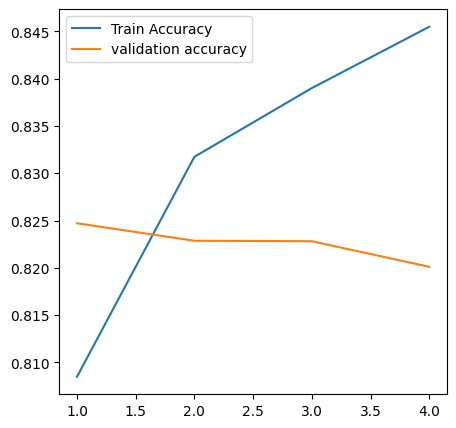

In [ ]:
view_performance(rnn1_history, recall_values)

- the model began to overfif from the second epochs. Hence, I will add dropout layers to minimize overfiting.

In [ ]:
#evaluate performance on test set
rnn1.evaluate(x_test, y_test_c)

625/625 [==============================] - 12s 19ms/step - loss: 0.3822 - accuracy: 0.8293


[0.38220569491386414, 0.829265832901001]

- an accuracy of 0.82 was obtained from the test set.

## Adding dropout layers

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
from tensorflow.keras.layers import SpatialDropout1D

In [ ]:
def RNN_model(embedding_dims=100,output_sequence_length=100, hidden_dims=32):
    model = Sequential()



    model.add(Embedding(1000, output_dim=embedding_dims,input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.5)) #add spatial dropout
    model.add(SimpleRNN(units=hidden_dims))
    model.add(Dense(64, activation = 'relu',))
    model.add(Dropout(0.3)) #add dropout layer
    model.add(Dense(2, activation ='sigmoid'))

    model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

    return model

In [ ]:
rnn2 = RNN_model()

rnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

In [ ]:
#initialize the recall metrics
recall2 = Recall_Calculate(x_val, y_val)

In [ ]:
rnn2_history = rnn2.fit(x_train, y_train_c, batch_size=64,
        validation_data= (x_val, y_val_c), epochs=5, callbacks=[est, mcp,recall2])

Epoch 1/5
625/625 [==============================] - 6s 10ms/step
Validation Recall: 0.8245649129825965
2500/2500 [==============================] - 356s 142ms/step - loss: 0.4302 - accuracy: 0.7996 - val_loss: 0.3872 - val_accuracy: 0.8246
Epoch 2/5
625/625 [==============================] - 8s 12ms/step
Validation Recall: 0.8251650330066013
2500/2500 [==============================] - 320s 128ms/step - loss: 0.3933 - accuracy: 0.8249 - val_loss: 0.3885 - val_accuracy: 0.8252
Epoch 3/5
625/625 [==============================] - 8s 13ms/step
Validation Recall: 0.8284656931386277
2500/2500 [==============================] - 328s 131ms/step - loss: 0.3871 - accuracy: 0.8276 - val_loss: 0.3843 - val_accuracy: 0.8285
Epoch 4/5
625/625 [==============================] - 9s 15ms/step
Validation Recall: 0.8277655531106222
2500/2500 [==============================] - 348s 139ms/step - loss: 0.3842 - accuracy: 0.8299 - val_loss: 0.3827 - val_accuracy: 0.8278
Epoch 5/5
625/625 [=================

In [ ]:
recall_values = recall2.recall_values #recall scores

np.mean(recall_values)

0.8264352870574114

- the average recall_score obtained by the model is 0.826.
- this means that the model was able to correctly classify 82.6% negative reviews in the dataset.
- it showed a validation accuracy of 0.8285 at the second epoch, which means that 82.85% of the total predictions were accurate.

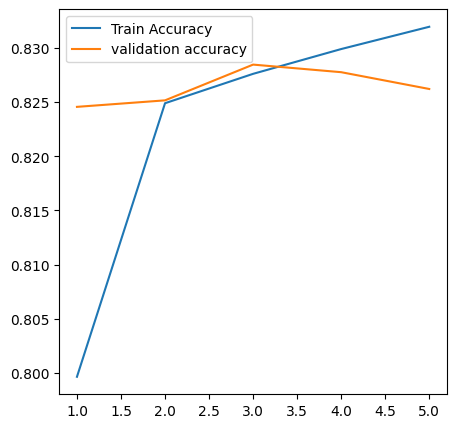

In [ ]:
view_performance(rnn2_history, recall_values)

- the chart indicates that the model began to overfit from the 4th epoch.

In [ ]:
#evaluate performance on test set
rnn2.evaluate(x_test, y_test_c)

625/625 [==============================] - 7s 11ms/step - loss: 0.3758 - accuracy: 0.8289


[0.37577101588249207, 0.8288657665252686]

- an accuracy of 82.89% was obtained on the test set. this suggests that the model is generalizing well.

# Implementing LSTM

In [ ]:
def lstm(embedding_dims=100,output_sequence_length=100, hidden_dims=32):
    model = Sequential()

    model.add(Embedding(1000, output_dim=embedding_dims,input_length= X.shape[1]))
    model.add(SpatialDropout1D(0.5)) #add spatial dropout
    model.add(LSTM(units=hidden_dims))
    model.add(Dense(64, activation = 'relu',))
    model.add(Dropout(0.5)) #add dropout layer
    model.add(Dense(2, activation ='sigmoid'))

    model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

    return model

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
lstm_model = lstm()

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

In [ ]:
#initialize the recall metrics
recall3 = Recall_Calculate(x_val, y_val)

In [ ]:
history_lstm = lstm_model.fit(x_train, y_train_c, batch_size=64,
        validation_data= (x_val, y_val_c), epochs=5, callbacks=[est, mcp,recall3])

Epoch 1/5
2500/2500 [==============================] - ETA: 0s - loss: 0.4070 - accuracy: 0.8159

625/625 [==============================] - 2s 3ms/step
Validation Recall: 0.8307161432286457
2500/2500 [==============================] - 74s 28ms/step - loss: 0.4070 - accuracy: 0.8159 - val_loss: 0.3801 - val_accuracy: 0.8307
Epoch 2/5
2500/2500 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8342

625/625 [==============================] - 2s 3ms/step
Validation Recall: 0.8353170634126825
2500/2500 [==============================] - 33s 13ms/step - loss: 0.3739 - accuracy: 0.8342 - val_loss: 0.3671 - val_accuracy: 0.8353
Epoch 3/5
625/625 [==============================] - 2s 3ms/step
Validation Recall: 0.8352670534106821
2500/2500 [==============================] - 27s 11ms/step - loss: 0.3627 - accuracy: 0.8397 - val_loss: 0.3627 - val_accuracy: 0.8353
Epoch 4/5
2500/2500 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.8427

625/625 [==============================] - 2s 3ms/step
Validation Recall: 0.8392178435687138
2500/2500 [==============================] - 30s 12ms/step - loss: 0.3555 - accuracy: 0.8427 - val_loss: 0.3600 - val_accuracy: 0.8392
Epoch 5/5
2500/2500 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8466

625/625 [==============================] - 2s 3ms/step
Validation Recall: 0.839867973594719
2500/2500 [==============================] - 29s 12ms/step - loss: 0.3497 - accuracy: 0.8466 - val_loss: 0.3553 - val_accuracy: 0.8399


In [ ]:
recall_values = recall3.recall_values #recall scores

np.mean(recall_values)

0.8360772154430887

- the average recall_score obtained by the model is 0.836.
- this means that the model was able to correctly classify 83.6% negative reviews in the dataset.
- it showed an accuracy of 0.8466 at the fifth epoch, which means that 84.66% of the total predictions were accurate.
### this is the best performance thus far.

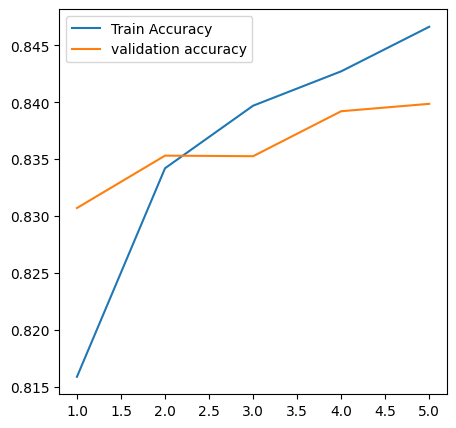

In [ ]:
view_performance(history_lstm, recall_values)

- although a high accuracy of 0.846 was obtained, the model showed to be overfiting from the second epoch.

# Scopes of improvement
- The best performance was obtained from the LSTM model.

- a better performance may be obtained by implementing hyper-parameter tuning on the tree based, ensemble model, RNN and LSTM model as this will give the best set of hyper-parameters.

- increasing the number of layers, neurons as well as applying dropout layers to combat overfiting might enhance the performance of the RNN and LSTM models.


- a BERT architecture can be implemented to evaluate the performance.